In [91]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [92]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/siglimumuni/Datasets/master/customer-data.csv")

In [93]:

# Display the first few rows of the dataset
print("First five rows of the dataset:")
print(df.head())


First five rows of the dataset:
       id    age  gender      race driving_experience    education  \
0  569520    65+  female  majority               0-9y  high school   
1  750365  16-25    male  majority               0-9y         none   
2  199901  16-25  female  majority               0-9y  high school   
3  478866  16-25    male  majority               0-9y   university   
4  731664  26-39    male  majority             10-19y         none   

          income  credit_score  vehicle_ownership vehicle_year  married  \
0    upper class      0.629027               True   after 2015    False   
1        poverty      0.357757              False  before 2015    False   
2  working class      0.493146               True  before 2015    False   
3  working class      0.206013               True  before 2015    False   
4  working class      0.388366               True  before 2015    False   

   children  postal_code  annual_mileage vehicle_type  speeding_violations  \
0      True       

In [94]:

# Display basic information about the dataset
print("\nDataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  1

In [95]:

# Check for missing values
print("\nMissing Values:")
df.isna().sum()



Missing Values:


id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [96]:

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
                  id  credit_score   postal_code  annual_mileage  \
count   10000.000000   9018.000000  10000.000000     9043.000000   
mean   500521.906800      0.515813  19864.548400    11697.003207   
std    290030.768758      0.137688  18915.613855     2818.434528   
min       101.000000      0.053358  10238.000000     2000.000000   
25%    249638.500000      0.417191  10238.000000    10000.000000   
50%    501777.000000      0.525033  10238.000000    12000.000000   
75%    753974.500000      0.618312  32765.000000    14000.000000   
max    999976.000000      0.960819  92101.000000    22000.000000   

       speeding_violations         DUIs  past_accidents  
count         10000.000000  10000.00000    10000.000000  
mean              1.482900      0.23920        1.056300  
std               2.241966      0.55499        1.652454  
min               0.000000      0.00000        0.000000  
25%               0.000000      0.00000        0.000000  
50%               

In [97]:
#Check the mean credit score for each income group
df.groupby(by="income")["credit_score"].mean()

income
middle class     0.523659
poverty          0.348331
upper class      0.613827
working class    0.431929
Name: credit_score, dtype: float64

In [98]:
#Create a function to impute missing values based on mean credit score for each income group
def impute_creditscore(income_classes):
    """This function takes a list of income groups and imputes the missing values of each based on the mean credit score for          each group"""
    #iterate through each income group
    for income_class in income_classes:      
        
        #create a subset of dataframe to use as filter
        mask = df["income"] == income_class
        
        #calculate the mean for the income group
        mean = df[df["income"] == income_class]["credit_score"].mean()
        
        #fill the missing values with mean of credit score for group
        df.loc[mask,"credit_score"] = df.loc[mask,'credit_score'].fillna(mean)

In [99]:
#Apply the function to the dataframe
income_groups = ["poverty","upper class","middle class","working class"]
impute_creditscore(income_groups)

#check for missing values
df.isnull().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score             0
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [100]:
#Check the mean annual mileage for the different driving experience groups
df.groupby(by="driving_experience")["annual_mileage"].mean()

driving_experience
0-9y      12249.131670
10-19y    11791.275168
20-29y    11144.181256
30y+      10694.968553
Name: annual_mileage, dtype: float64

In [101]:
#Calculate mean for annual_mileage column
mean_mileage = df["annual_mileage"].mean()

#Fill in null values using the column mean
df["annual_mileage"].fillna(mean_mileage,inplace=True)

#Check for null values
df.isna().sum()

id                     0
age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

In [102]:
#Delete the id and postal_code columns
df.drop(["id","postal_code"],axis=1,inplace=True)

In [103]:
#Check the count for each category in the "gender" column
df["gender"].value_counts()

gender
female    5010
male      4990
Name: count, dtype: int64

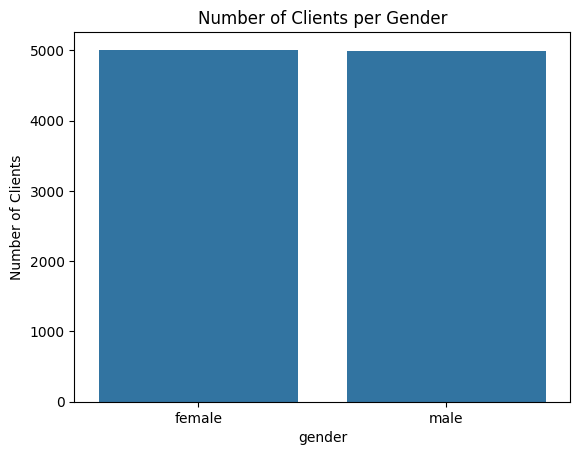

In [104]:
#Create a countplot to visualize the count of each category in the gender column.
sns.countplot(data=df,x="gender")
plt.title("Number of Clients per Gender")
plt.ylabel("Number of Clients")
plt.show()

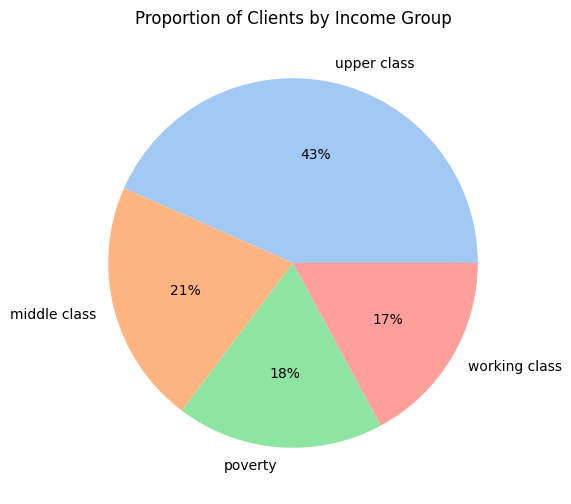

In [105]:
#Define plot size
plt.figure(figsize=[6,6])

#Define column to use
data = df["income"].value_counts(normalize=True)

#Define labels
labels = ["upper class","middle class","poverty","working class"]

#Define color palette
colors = sns.color_palette('pastel')

#Create pie chart
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Proportion of Clients by Income Group")
plt.show()

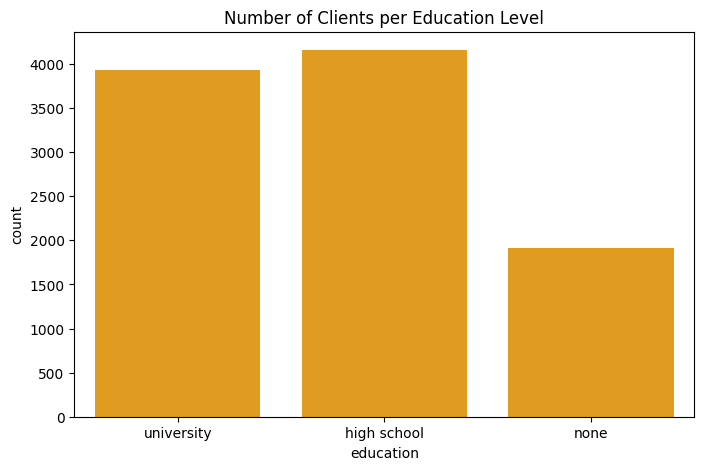

In [106]:
#Create a countplot to visualize the count of each category in the education column 
plt.figure(figsize=[8,5])
sns.countplot(data=df,x="education",order=["university","high school","none"],color="orange")
plt.title("Number of Clients per Education Level")
plt.show()

In [107]:
#Return summary statistics for the "credit_score" column
df["credit_score"].describe()

count    10000.000000
mean         0.515247
std          0.134628
min          0.053358
25%          0.421301
50%          0.523659
75%          0.613827
max          0.960819
Name: credit_score, dtype: float64

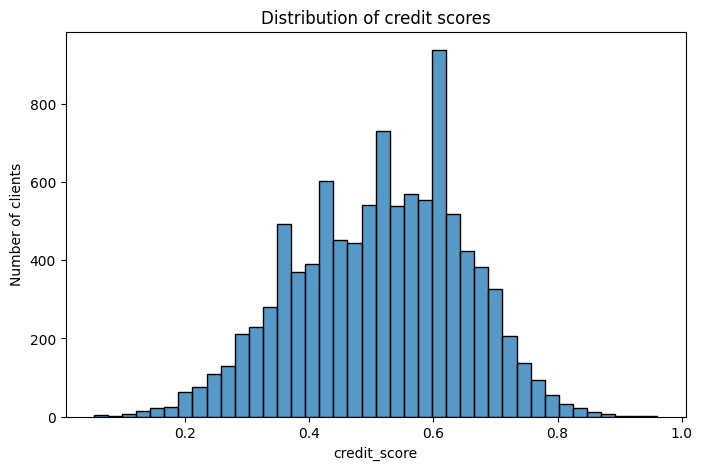

In [108]:
#Plot a histogram using the "credit_score" column
plt.figure(figsize=[8,5])
sns.histplot(data=df,x="credit_score",bins=40).set(title="Distribution of credit scores",ylabel="Number of clients")
plt.show()

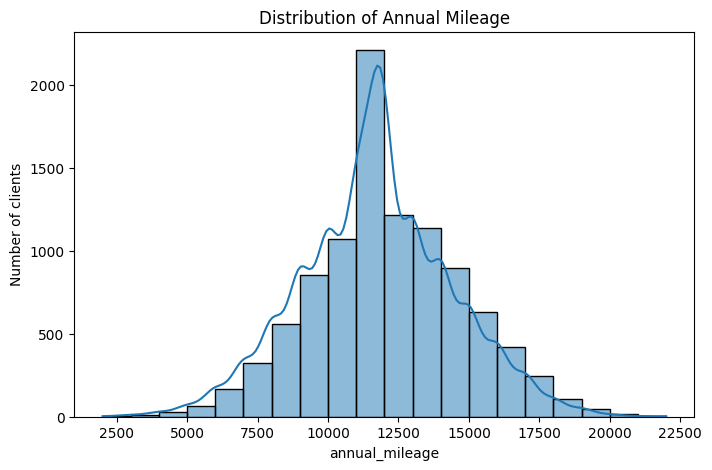

In [109]:
#Plot a histogram using the "annual_mileage" column
plt.figure(figsize=[8,5])
sns.histplot(data=df,x="annual_mileage",bins=20,kde=True).set(title="Distribution of Annual Mileage",ylabel="Number of clients")
plt.show()

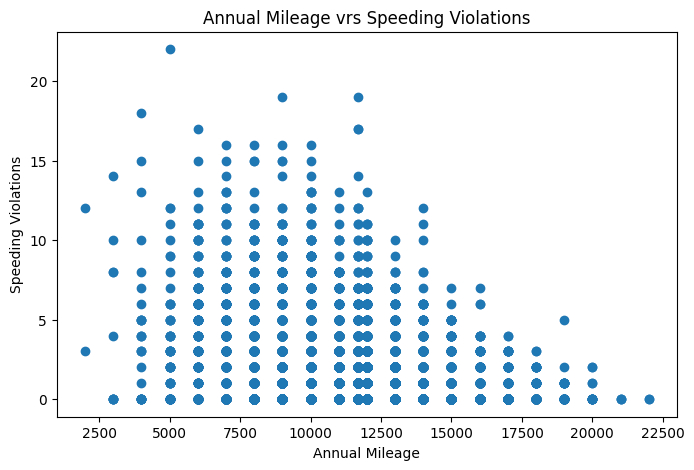

In [110]:
#Create a scatter plot to. show relationship between "annual_mileage" and "speeding_violations"
plt.figure(figsize=[8,5])
plt.scatter(data=df,x="annual_mileage",y="speeding_violations")
plt.title("Annual Mileage vrs Speeding Violations")
plt.ylabel("Speeding Violations")
plt.xlabel("Annual Mileage")
plt.show()

In [111]:
#Create a correlation matrix to show relationship between select variables
corr_matrix = df[["speeding_violations","DUIs","past_accidents"]].corr()
corr_matrix

,speeding_violations,DUIs,past_accidents
speeding_violations,1.000000,0.359838,0.443074
DUIs,0.359838,1.000000,0.259359
past_accidents,0.443074,0.259359,1.000000


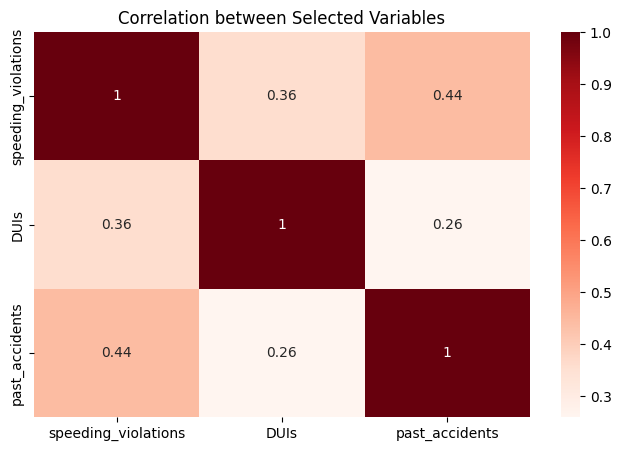

In [112]:
#Create a heatmap to visualize correlation
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix,annot=True,cmap='Reds')
plt.title("Correlation between Selected Variables")
plt.show()

In [113]:
#Check the mean annual mileage per category in the outcome column
df.groupby('outcome')['annual_mileage'].mean()

outcome
False    11375.549735
True     12401.574221
Name: annual_mileage, dtype: float64

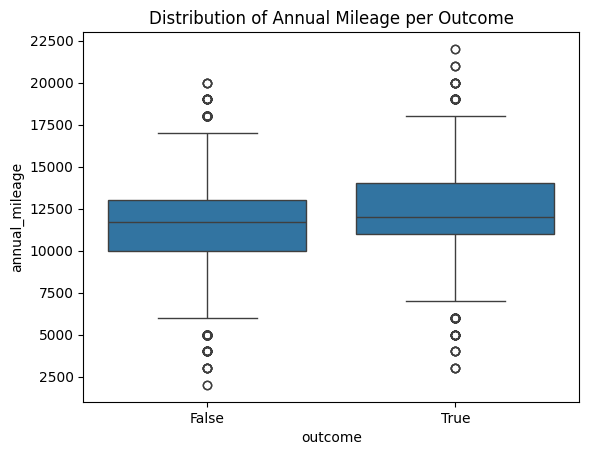

In [114]:
#Plot two boxplots to compare dispersion
sns.boxplot(data=df,x='outcome', y='annual_mileage')
plt.title("Distribution of Annual Mileage per Outcome")
plt.show()

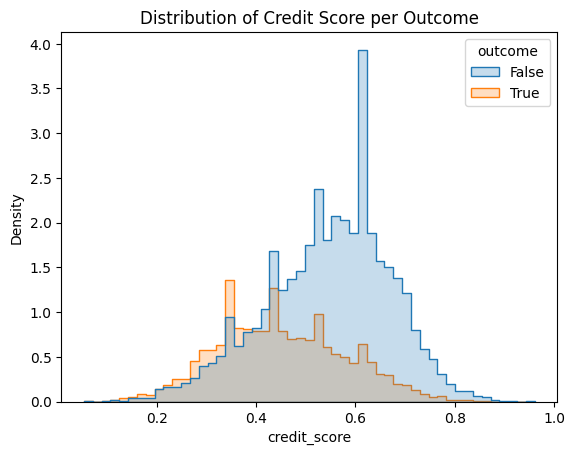

In [115]:
#Create histograms to compare distribution 
sns.histplot(df,x="credit_score",hue="outcome",element="step",stat="density")
plt.title("Distribution of Credit Score per Outcome")
plt.show()

In [116]:
#Create a new "claim rate" column
df['claim_rate'] = np.where(df['outcome']==True,1,0)
df['claim_rate'].value_counts()

claim_rate
0    6867
1    3133
Name: count, dtype: int64

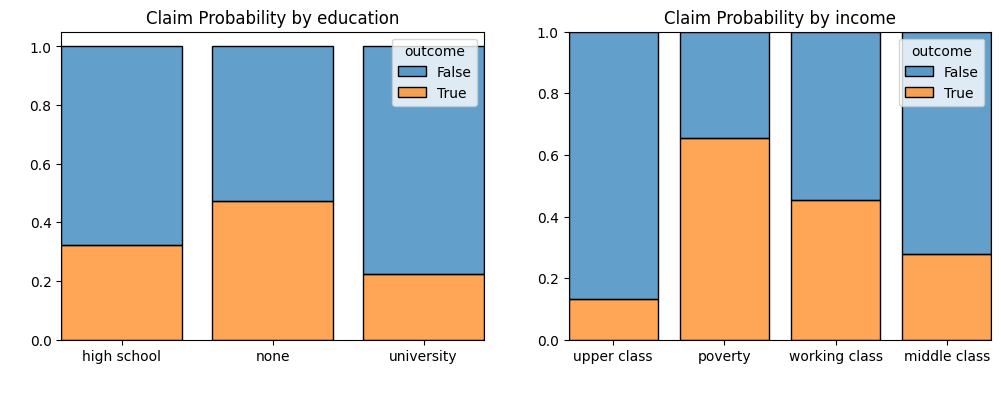

In [117]:
#Create an empty figure object
fig, axes = plt.subplots(1,2,figsize=(12,4))

#Plot two probability graphs for education and income
for i,col in enumerate(["education","income"]):
    sns.histplot(df, ax=axes[i],x=col, hue="outcome",stat="probability", multiple="fill", shrink=.8,alpha=0.7)
    axes[i].set(title="Claim Probability by "+ col,ylabel=" ",xlabel=" ")

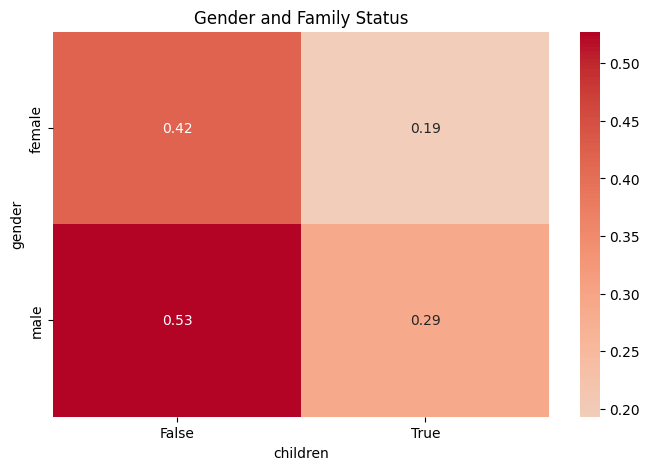

In [118]:
#Create pivot table for gender and family status with average claim rate as values
gender_children = pd.pivot_table(data=df,index='gender',columns='children',values='claim_rate')

#Create a heatmap to visualize gender, family status and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(gender_children,annot=True,cmap='coolwarm', center=0.117)
plt.title("Gender and Family Status")
plt.show()